In [1]:
import matplotlib.pyplot as plt

In [2]:
import graph_tool.all as gt

In [ ]:
import numpy as np

# 1 - Rede das bitcoin

In [272]:
g1 = gt.load_graph_from_csv("Datasets/soc-sign-bitcoinotc.csv.gz", directed =1)

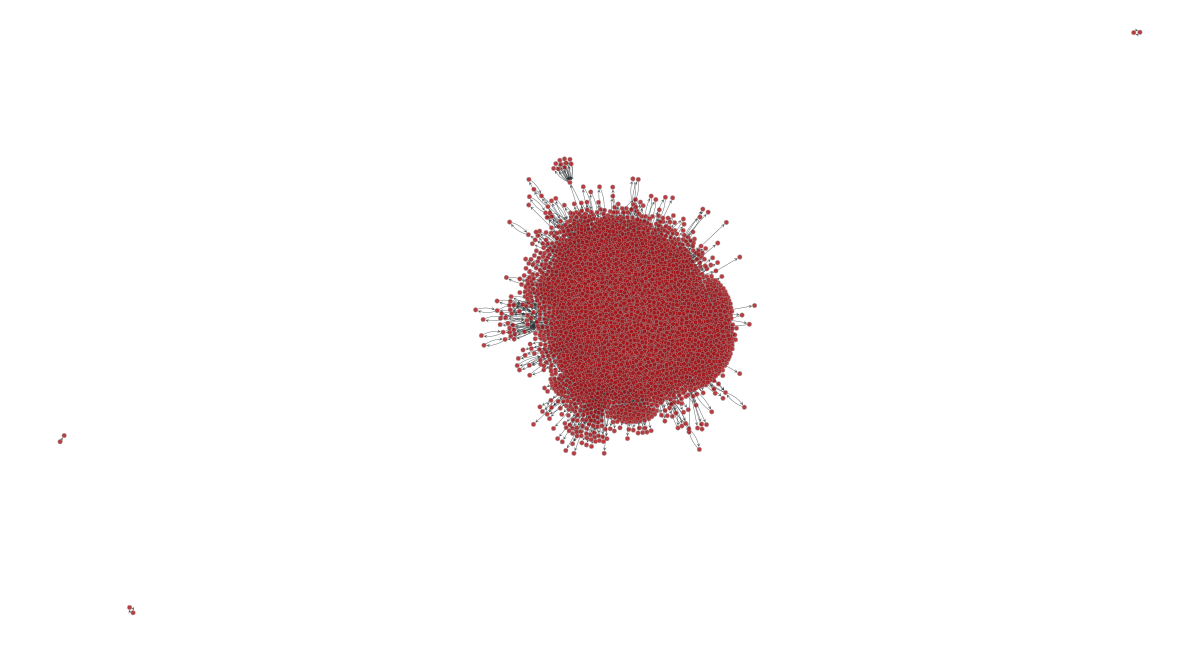

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fd17714f070, at 0x7fd177635a30>

In [156]:
gt.graph_draw(g)

### Estudo dos graus

#### máximo, mínimo, média, mediana, desvio padrão, e distribuição empírica

In [117]:
H1 = gt.vertex_hist(g1, "out")

In [118]:
x, y = H1

In [119]:
len(x), lexn(y)

(764, 765)

In [120]:
y = y[:-1]

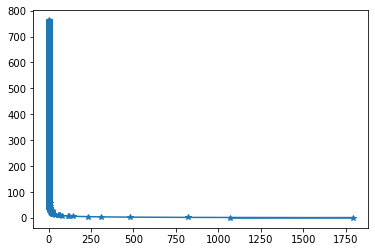

In [121]:
plt.plot(x,y,'*-')

In [122]:
def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

In [126]:
x1, y1 = ecdf(x)

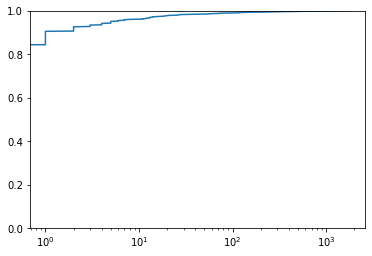

In [136]:
plt.semilogx(x1, y1);
plt.show();

In [170]:
gt.vertex_average(g,"out")

(6.052031967352491, 0.2749671763265546)

## Distancia


In [138]:
DH = gt.distance_histogram(g)

In [151]:
xx1, yy1  = ecdf(xx)

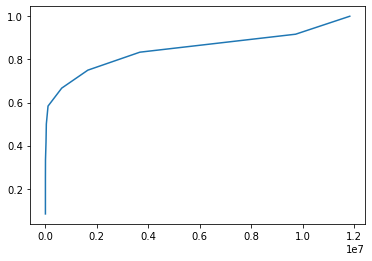

In [153]:
plt.plot(xx1,yy1)

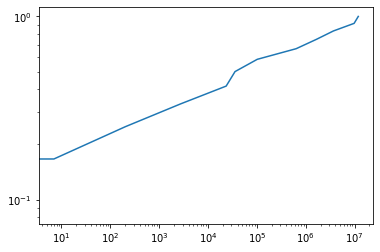

In [155]:
plt.loglog(xx1,yy1);

In [63]:
DistH =  gt.distance_histogram(g)
DistH

[array([0.0000000e+00, 4.2984000e+04, 2.4057780e+06, 1.3941952e+07,
        1.4491508e+07, 3.2089060e+06, 3.8557400e+05, 3.1516000e+04,
        1.5020000e+03, 3.6000000e+01]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint64)]

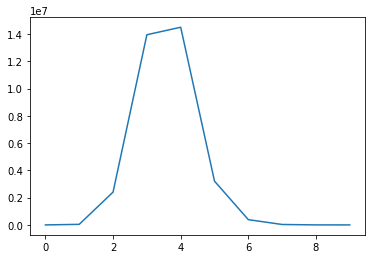

In [66]:
plt.plot(DistH[0]);

### Componentes

In [71]:
gt.label_components(g)

(<VertexPropertyMap object with value type 'int32_t', for Graph 0x7f7df0665220, at 0x7f7de65c55e0>,
 array([5875,    2,    2,    2], dtype=uint64))

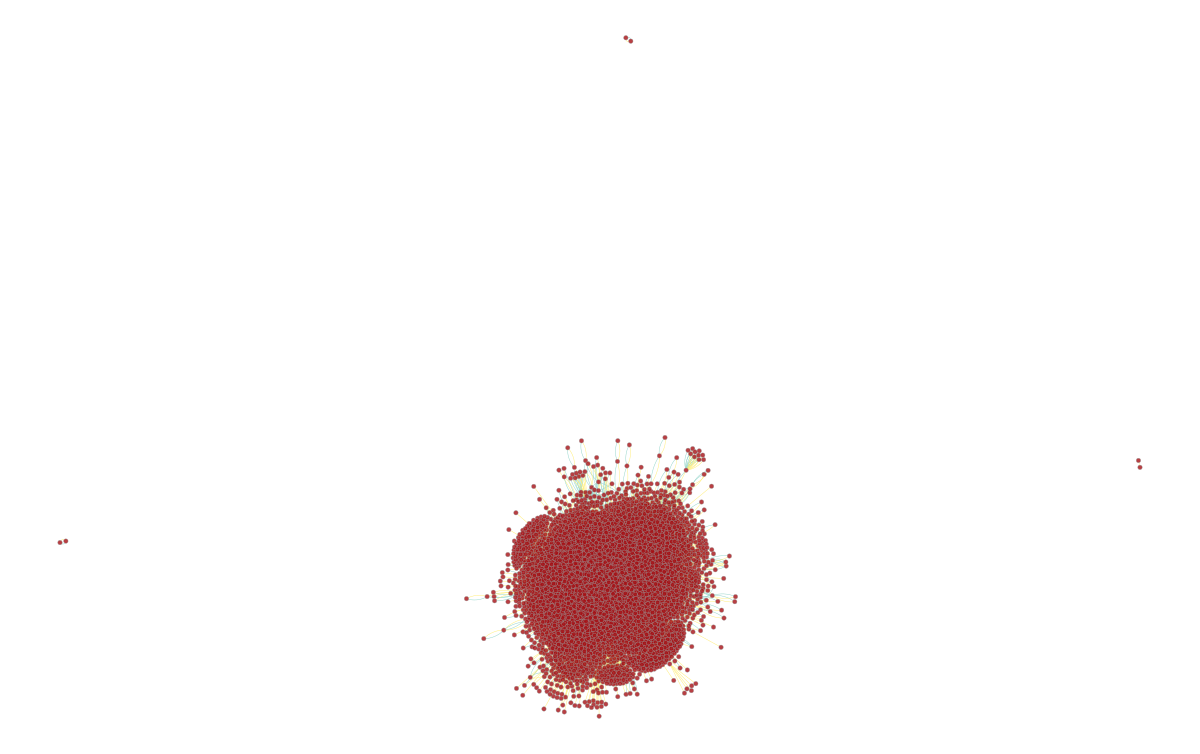

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f7df0665220, at 0x7f7de656cd00>

In [76]:
tree = gt.min_spanning_tree(g)
gt.graph_draw(g, edge_color=tree)

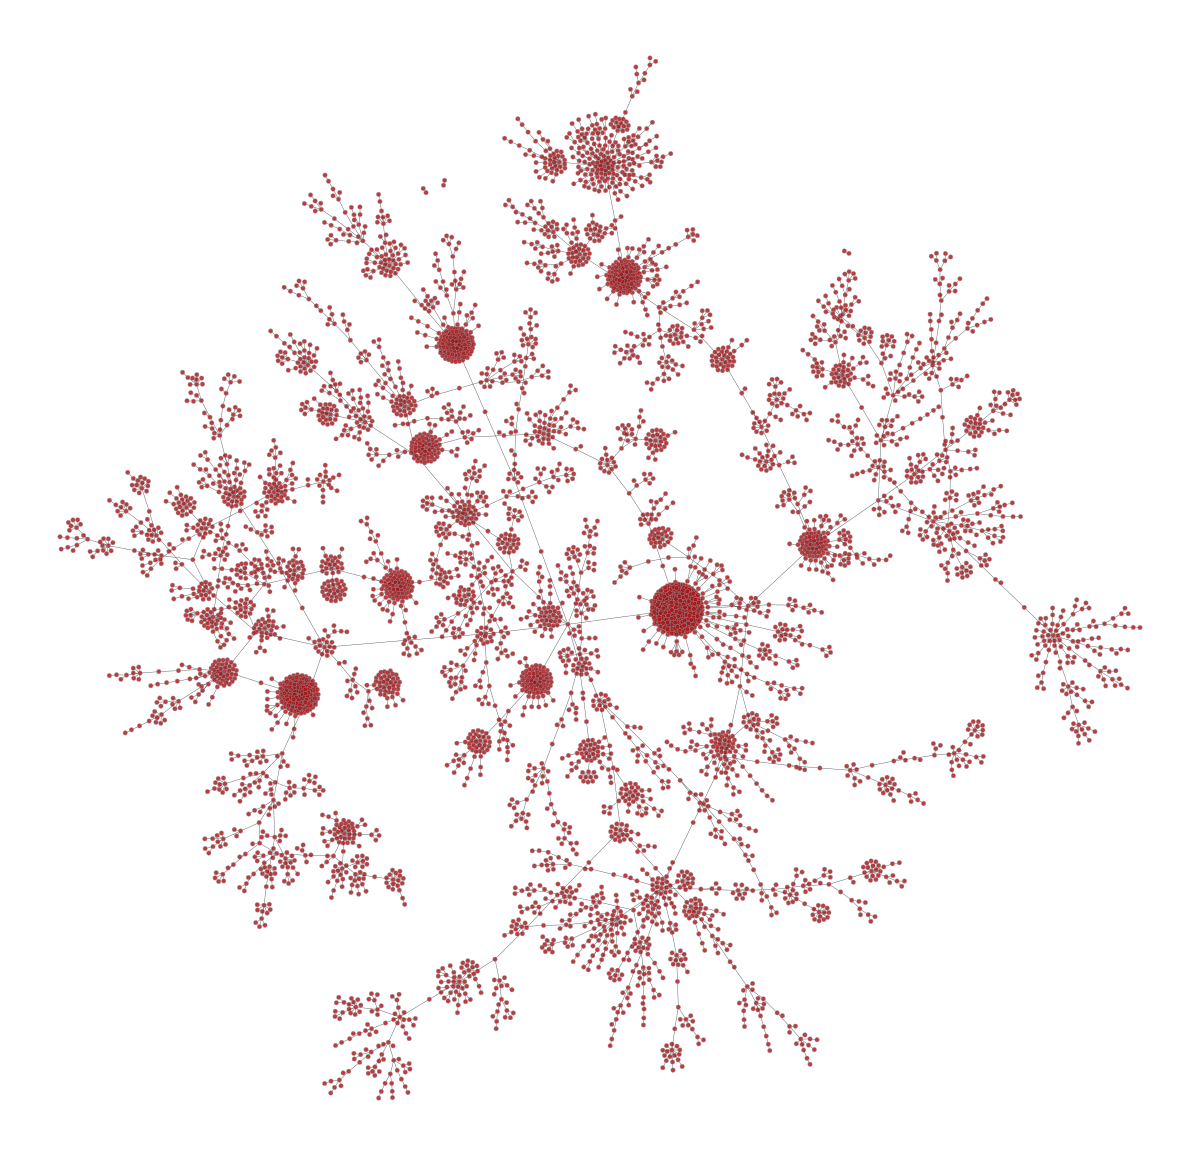

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f7df0665220, at 0x7f7de65fc760>

In [78]:
g.set_edge_filter(tree)
gt.graph_draw(g)

In [79]:
bv, be = gt.betweenness(g)
be.a /= be.a.max() / 5

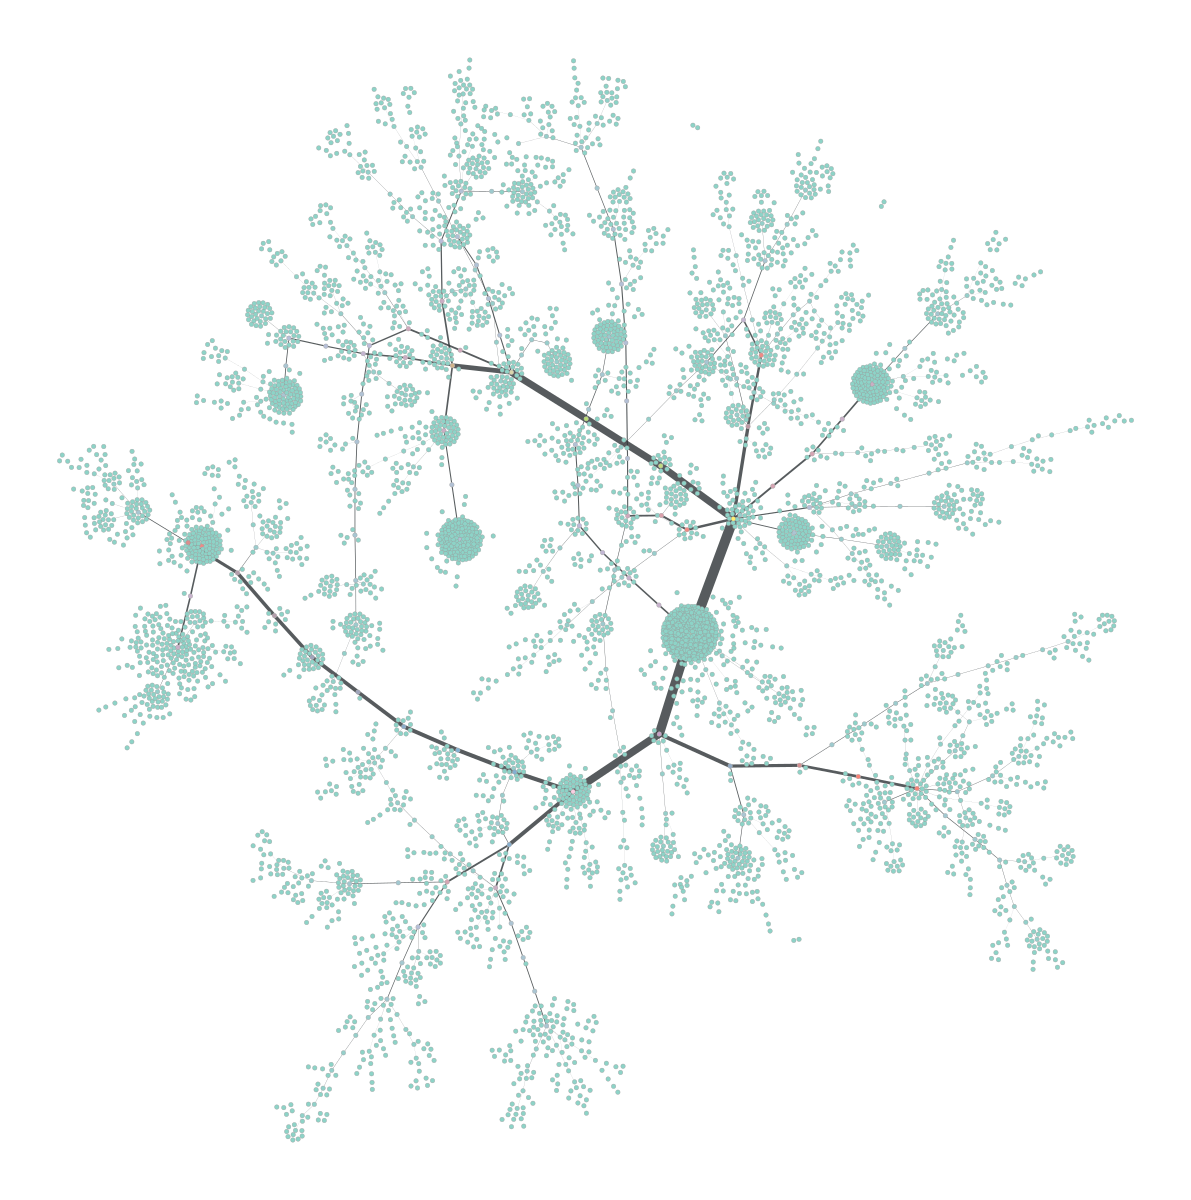

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f7df0665220, at 0x7f7de6534850>

In [80]:
gt.graph_draw(g, vertex_fill_color=bv, edge_pen_width=be)

In [225]:
61**2

3721

In [223]:
sum(gt.distance_histogram(g2)[0])

3782.0

In [220]:
gt.distance_histogram(g2)

[array([   0.,  318.,  896., 1000.,  704.,  516.,  260.,   74.,   14.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint64)]

In [221]:
g2

<Graph object, undirected, with 62 vertices and 159 edges, 2 internal vertex properties, 2 internal graph properties, at 0x7fd177795f10>

astro-ph
power
dolphins

## MEGA MASTER ULTRA FAST PUMP

In [306]:
def hist_plotter_pumps(gn):
    Hn     = gt.vertex_hist(gn, "total")
    x,y    = Hn
    xn, yn = ecdf(x)
    
    bb = burrice(Hn)
    
    print(' Olha o Grau ')
    print(gt.vertex_average(gn,"total"))
    print(np.max(bb), np.min(bb), np.median(bb))
    
    print(' Agora para as Distancias')
    
    DistH     =  gt.distance_histogram(gn)
    xx, yy    = DistH
    xxn, yyn  = ecdf(xx)

    bb2       = burrice(DistH)
    print((np.mean(bb2), np.std(bb2)))
    print(np.max(bb2), np.min(bb2), np.median(bb2))
    return xn, yn, xxn, yyn

In [279]:
g1

<Graph object, directed, with 5881 vertices and 35592 edges, 1 internal vertex property, 2 internal edge properties, at 0x7fd1706a9910>

In [275]:
Hh = gt.vertex_hist(g1, 'total')

In [304]:
def burrice(L):
    a,b = L
    lista_burra = []
    for i,j in zip(a,b):
        i = int(i)
        lista_burra += i*[j]
    return np.array(lista_burra)

In [305]:
burrice(Hh)

array([   1,    1,    1, ...,  715,  818, 1298], dtype=uint64)

In [291]:
sum(Hh[0][:3])

2451.0

In [278]:
Hh[1]

array([   0,    1,    2, ..., 1297, 1298, 1299], dtype=uint64)

In [307]:
xz1, yz1, xxz1, yyz1 = hist_plotter_pumps(g1)

 Olha o Grau 
(12.104063934704982, 0.49937172589735424)
1298 1 4.0
 Agora para as Distancias
(3.7189130700273005, 0.892124696796505)
11 1 4.0


In [308]:
xz2, yz2, xxz2, yyz2 = hist_plotter_pumps(g2)

 Olha o Grau 
(5.129032258064516, 0.3723563568503411)
12 1 5.0
 Agora para as Distancias
(3.3569539925965097, 1.4839269395147945)
8 1 3.0


In [309]:
xz3, yz3, xxz3, yyz3 = hist_plotter_pumps(g3)

 Olha o Grau 
(2.66909532483303, 0.025483212389547604)
19 1 2.0
 Agora para as Distancias
(18.989185424445708, 6.507554119713554)
46 1 19.0


In [310]:
xz, yz, xxz, yyz = hist_plotter_pumps(g4)

 Olha o Grau 
(14.515862564348138, 0.16253922678142743)
360 0 6.0
 Agora para as Distancias
(4.797959542913144, 1.276040970094)
14 1 5.0


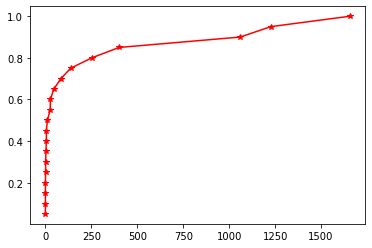

In [242]:
plt.plot(xz3,yz3,'r*-');

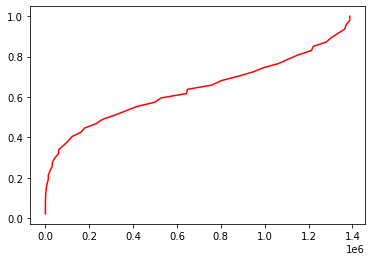

In [236]:
plt.plot(xxz3,yyz3,'r');

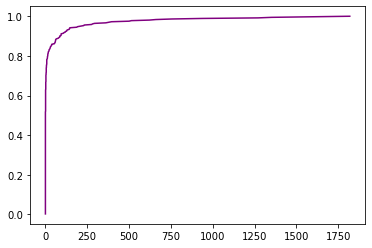

In [244]:
plt.plot(xz,yz,'purple');

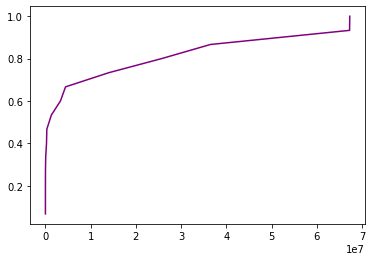

In [241]:
plt.plot(xxz,yyz,'purple');

### Dolphins

In [56]:
g2 = gt.collection.data["dolphins"]

## Power

In [8]:
g = gt.collection.data["power"]

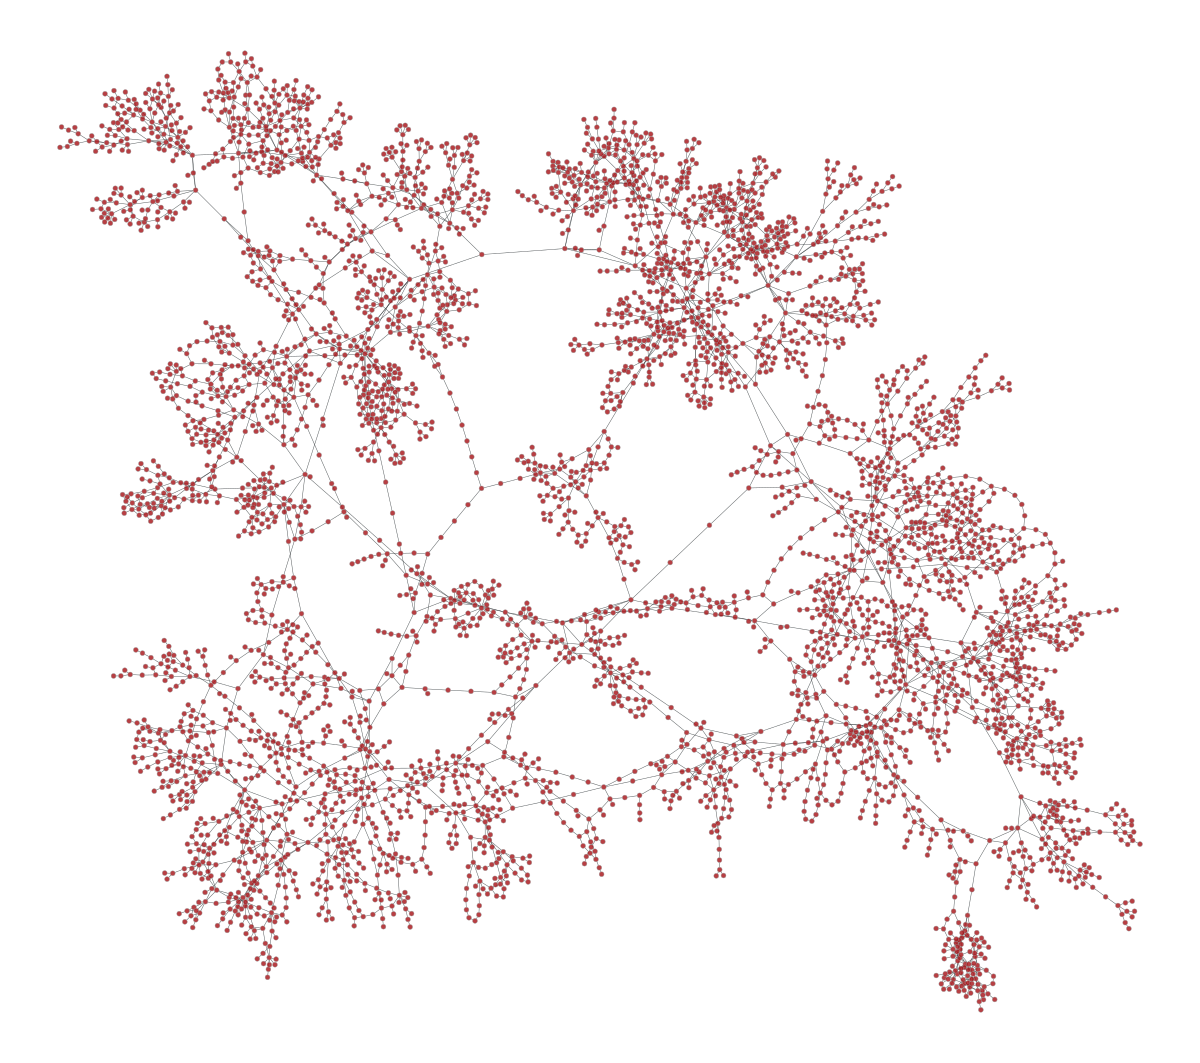

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f318caae5e0, at 0x7f31aa46c280>

In [10]:
gt.graph_draw(g)

In [11]:
g = gt.collection.data["astro-ph"]

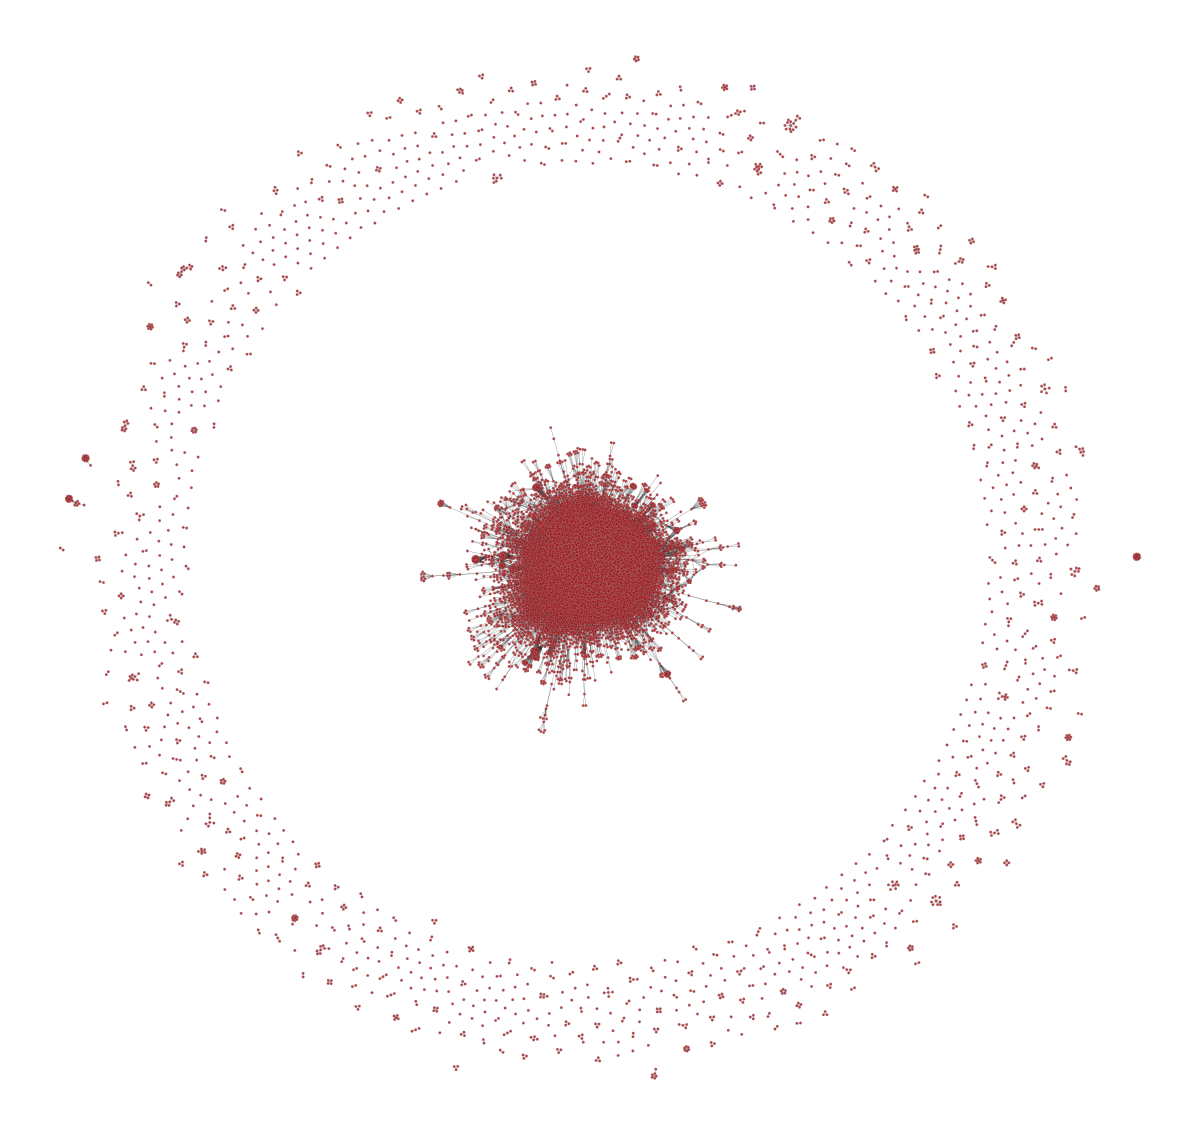

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f318b885e50, at 0x7f31c13cfd60>

In [12]:
gt.graph_draw(g)

### Centrality - Closeness DoubleDown

In [273]:
g = g1
g = gt.GraphView(g, vfilt=gt.label_largest_component(g))
pr = gt.closeness(g)

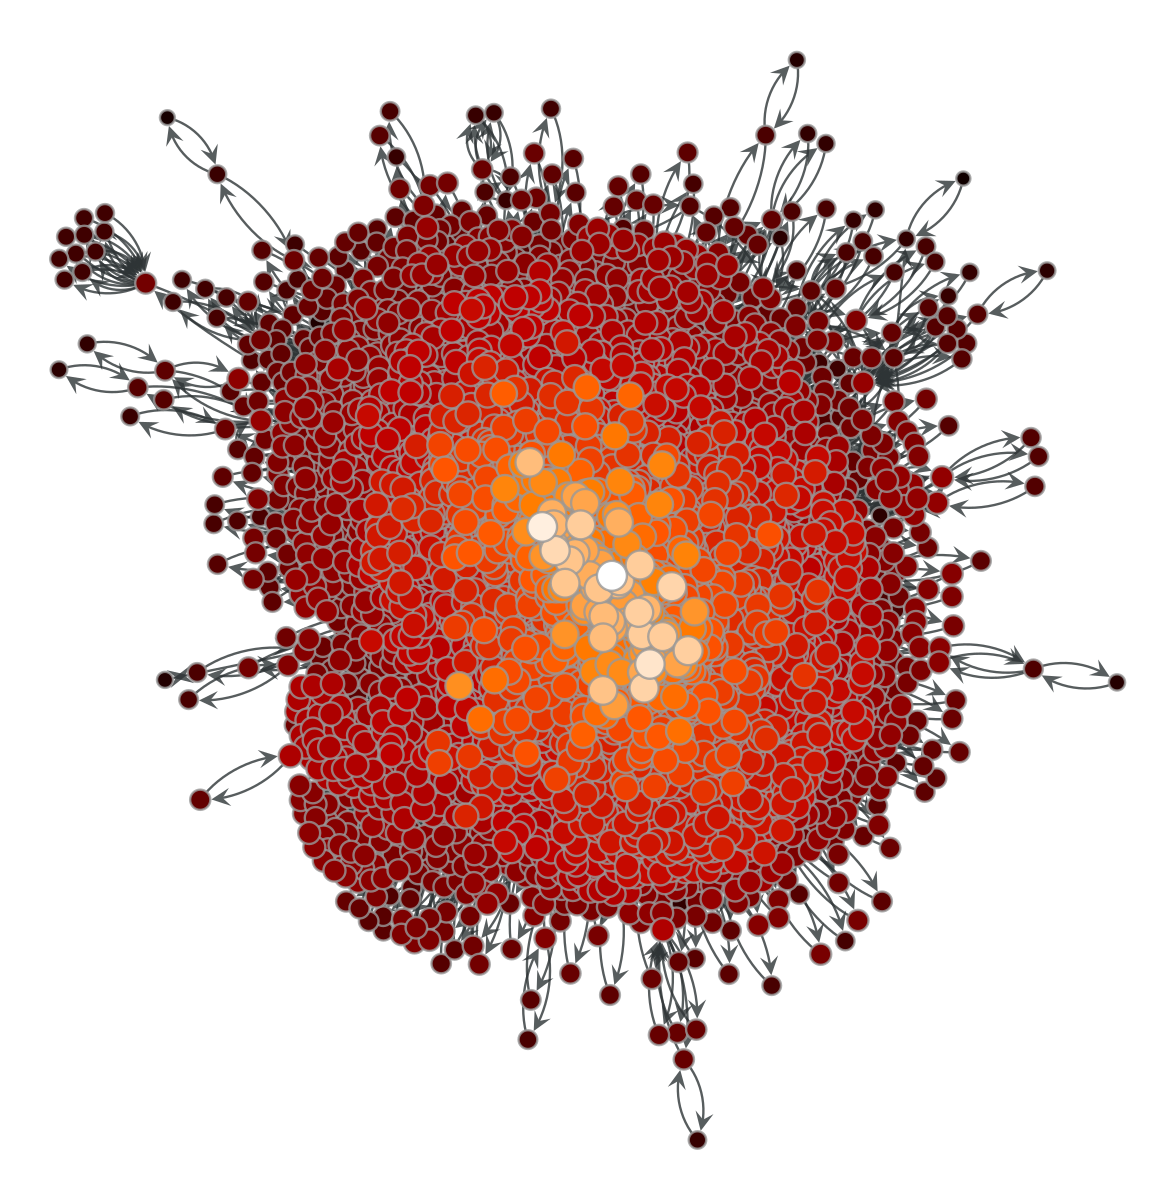

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fd1702042b0, at 0x7fd1701f2580>

In [274]:
gt.graph_draw(g, vertex_fill_color=pr,
              vertex_size=gt.prop_to_size(pr, mi=5, ma=15),
              vorder=pr, vcmap=plt.cm.gist_heat)

In [258]:
g = g2
g = gt.GraphView(g, vfilt=gt.label_largest_component(g))
pr = gt.closeness(g)

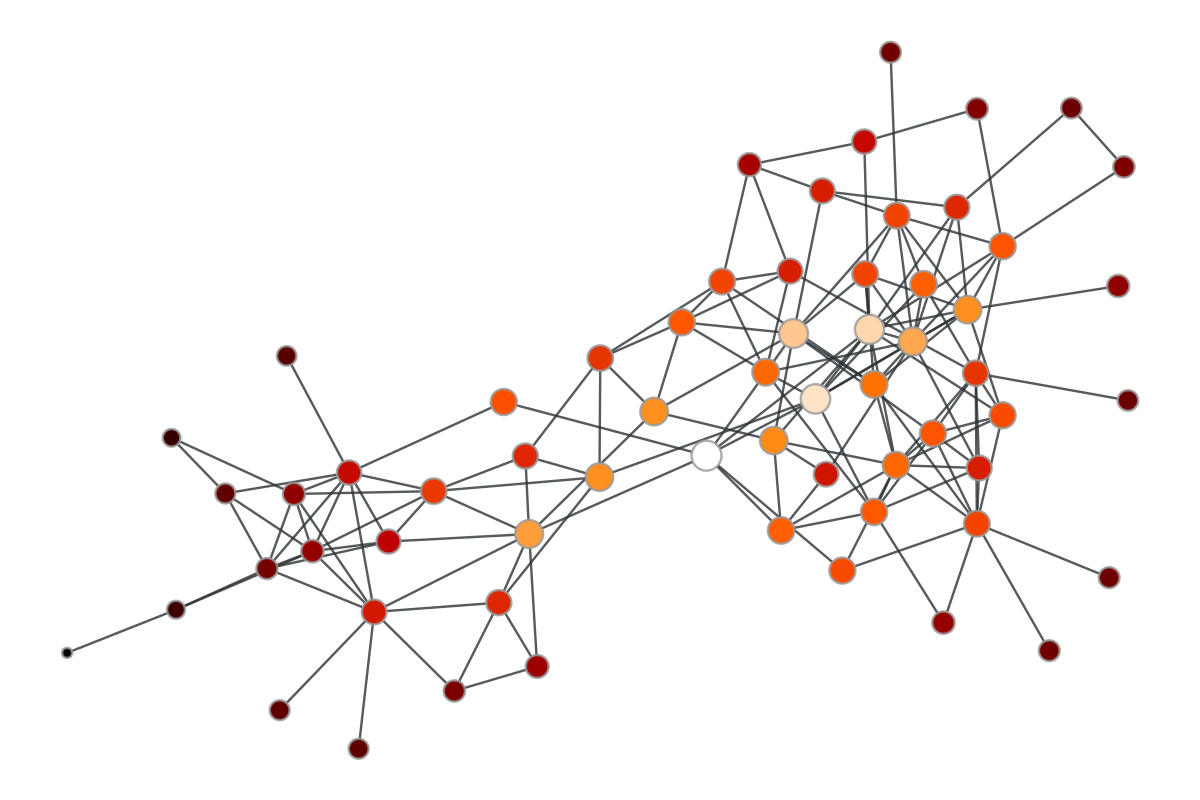

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fd1706ab400, at 0x7fd1706abcd0>

In [252]:
gt.graph_draw(g, pos=g.vp["pos"], vertex_fill_color=pr,
              vertex_size=gt.prop_to_size(pr, mi=5, ma=15),
              vorder=pr, vcmap=plt.cm.gist_heat)

In [255]:
g = g3
g = gt.GraphView(g, vfilt=gt.label_largest_component(g))
pr = gt.closeness(g)

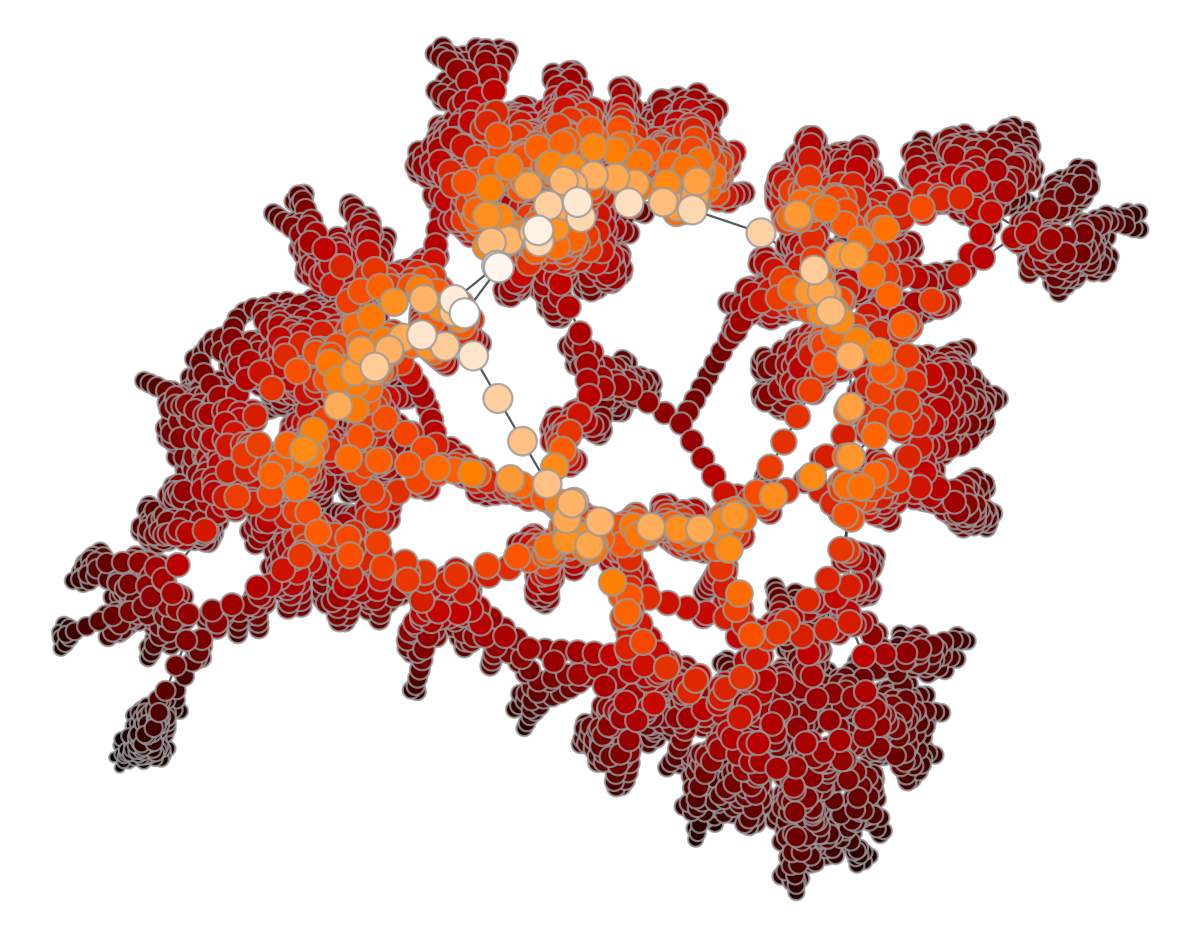

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fd1706aba00, at 0x7fd1701f62e0>

In [256]:
gt.graph_draw(g, pos=g.vp["pos"], vertex_fill_color=pr,
              vertex_size=gt.prop_to_size(pr, mi=5, ma=15),
              vorder=pr, vcmap=plt.cm.gist_heat)

In [264]:
g = g4
g = gt.GraphView(g, vfilt=gt.label_largest_component(g))
pr = gt.closeness(g)

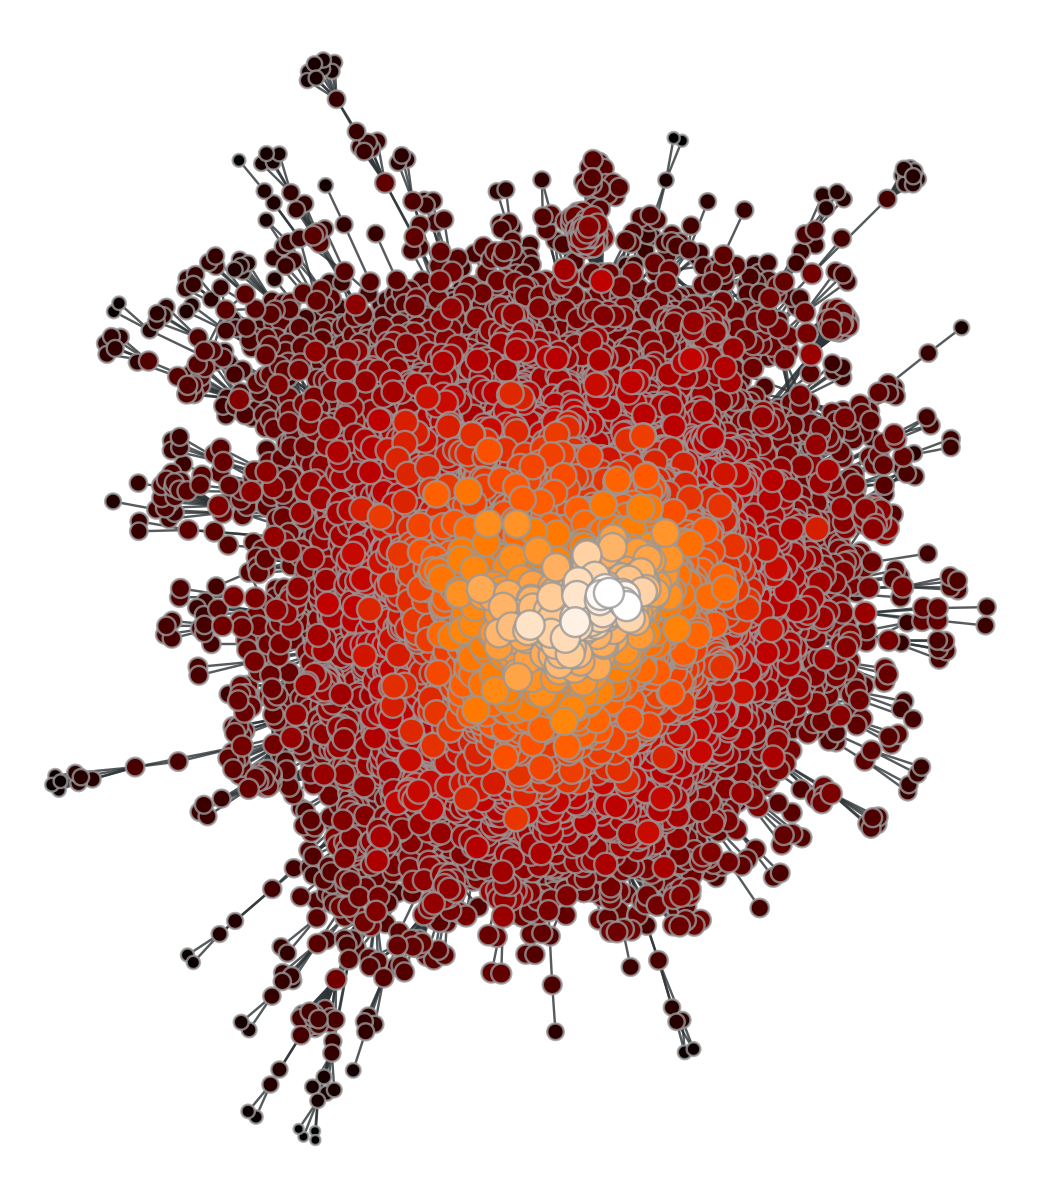

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fd17065d520, at 0x7fd1701f6a30>

In [265]:
gt.graph_draw(g, pos=g.vp["pos"], vertex_fill_color=pr,
              vertex_size=gt.prop_to_size(pr, mi=5, ma=15),
              vorder=pr, vcmap=plt.cm.gist_heat)